# 데이터 확인

In [1]:
import sys
print(sys.executable)

/opt/ml/miniconda3/envs/clf/bin/python


## 데이터 불러오기

In [2]:
import pandas as pd
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

## 결측치, 중복, 길이 분포

In [3]:
train.isnull().sum()

ID        0
text      0
target    0
url       0
date      0
dtype: int64

In [4]:
test.isnull().sum()

ID      0
text    0
url     0
date    0
dtype: int64

In [5]:
train['text'].unique()

array(['개포2단지 분양 앞두고 개포지구 재건축 불붙어', '삼성전자 KBIS 2018서 셰프컬렉션 선보여',
       'LG G6 사면 BO 이어폰이 단돈 5천원', ..., '정치권 엘시티 수사 돌발변수에 촉각…왜 지금',
       '문 대통령 1987 관람…깜짝 방문에 객석 환호·박수종합',
       '120년 전 대한제국으로…가을밤 정동에서 시간 여행 떠나다'], dtype=object)

- train data : 7000개
- 중복 데이터 없음
- 결측치 없음

# 타깃 분포 확인

분석 목적
- train data에 타깃 편향이 존재하는가?
- test data와의 분포 차이가 존재하는가?

<Axes: title={'center': 'target distribution (train data)'}, xlabel='target', ylabel='count'>

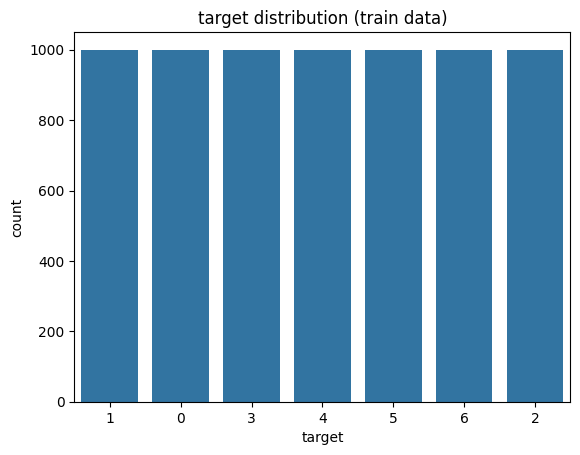

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.title('target distribution (train data)')
sns.countplot(data=train, x="target", order=train['target'].value_counts().index)

In [7]:
train['target'].value_counts()

target
1    1000
0    1000
3    1000
4    1000
5    1000
6    1000
2    1000
Name: count, dtype: int64

타깃 불균형 문제 없음. 0~6 모두 같은 개수의 라벨 존재

# 텍스트 길이 분포 확인

In [8]:
# 문장 전체 길이
train['text_len'] = train['text'].apply(lambda x : len(x))
# (공백 기준) 단어 개수
train['word_cnt'] = train['text'].apply(lambda x : len(x.split()))
# (공백 기준) unique 단어 개수
train['unique_word_cnt'] = train['text'].apply(lambda x : len(set(x.split())))

In [9]:
# 문장 전체 길이
test['text_len'] = test['text'].apply(lambda x : len(x))
# (공백 기준) 단어 개수
test['word_cnt'] = test['text'].apply(lambda x : len(x.split()))
# (공백 기준) unique 단어 개수
test['unique_word_cnt'] = test['text'].apply(lambda x : len(set(x.split())))

In [10]:
train.describe()

,target,text_len,word_cnt,unique_word_cnt
count,7000.000000,7000.000000,7000.000000,7000.000000
mean,3.000000,27.252714,6.545571,6.534857
std,2.000143,5.083921,1.490526,1.484188
min,0.000000,4.000000,2.000000,2.000000
25%,1.000000,25.000000,6.000000,6.000000
50%,3.000000,28.000000,7.000000,7.000000
75%,5.000000,31.000000,8.000000,8.000000
max,6.000000,44.000000,13.000000,13.000000


In [11]:
test.describe()

,text_len,word_cnt,unique_word_cnt
count,47785.000000,47785.000000,47785.000000
mean,27.342681,6.594078,6.582672
std,4.938568,1.469009,1.462716
min,4.000000,1.000000,1.000000
25%,25.000000,6.000000,6.000000
50%,28.000000,7.000000,7.000000
75%,31.000000,8.000000,8.000000
max,46.000000,13.000000,13.000000


array([[<Axes: title={'center': 'text_len'}>,
        <Axes: title={'center': 'word_cnt'}>],
       [<Axes: title={'center': 'unique_word_cnt'}>, <Axes: >]],
      dtype=object)

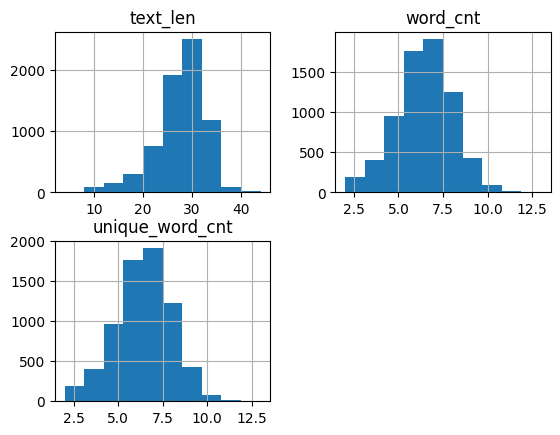

In [12]:
train[['text_len', 'word_cnt', 'unique_word_cnt']].hist()

array([[<Axes: title={'center': 'text_len'}>,
        <Axes: title={'center': 'word_cnt'}>],
       [<Axes: title={'center': 'unique_word_cnt'}>, <Axes: >]],
      dtype=object)

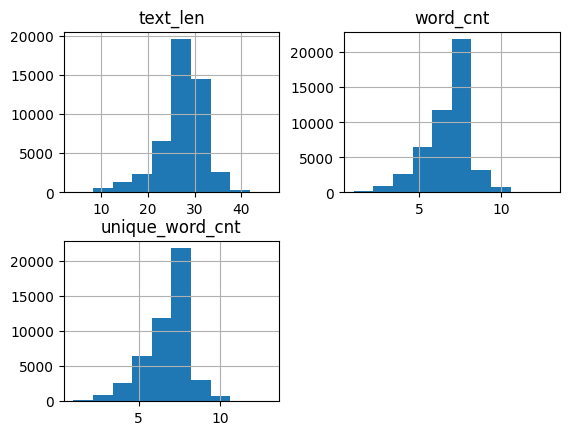

In [13]:
test[['text_len', 'word_cnt', 'unique_word_cnt']].hist()

## train - test 분포 비교

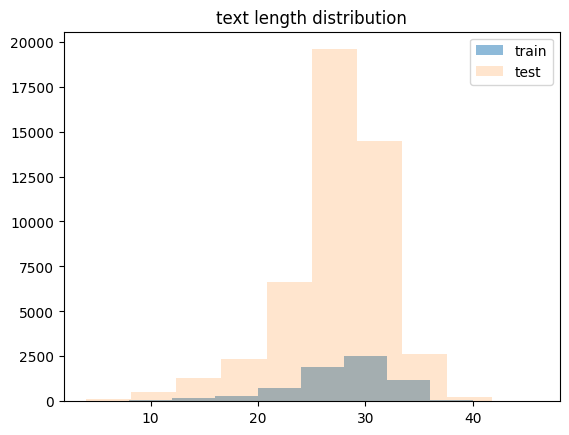

In [14]:
plt.hist(train['text_len'], alpha=0.5, label="train")
plt.hist(test['text_len'], alpha=0.2, label="test")
plt.legend()
plt.title("text length distribution")
plt.show()

text length는 대체적으로 비슷한 분포 

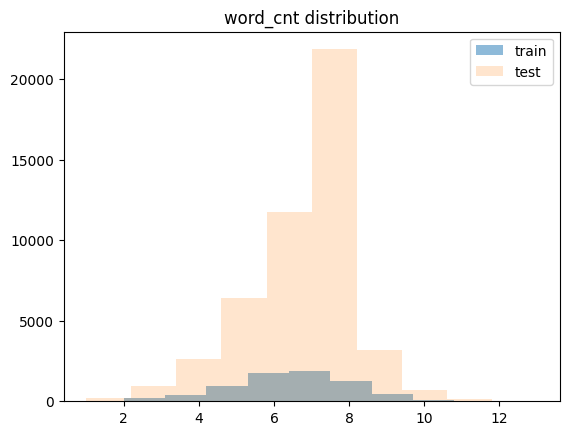

In [15]:
plt.hist(train['word_cnt'], alpha=0.5, label="train")
plt.hist(test['word_cnt'], alpha=0.2, label="test")
plt.legend()
plt.title("word_cnt distribution")
plt.show()

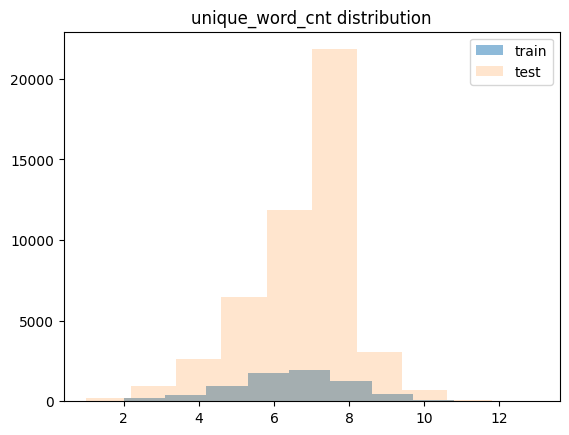

In [16]:
plt.hist(train['unique_word_cnt'], alpha=0.5, label="train")
plt.hist(test['unique_word_cnt'], alpha=0.2, label="test")
plt.legend()
plt.title("unique_word_cnt distribution")
plt.show()

## length min & max 확인

In [17]:
train.loc[train['text_len'] <= 5]

,ID,text,target,url,date,text_len,word_cnt,unique_word_cnt
756,ynat-v1_train_00756,봄 산책,3,https://news.naver.com/main/read.nhn?mode=LS2D...,2018.04.05. 오후 1:51,4,2,2


In [18]:
label_dict = {0 : 'IT과학', 1: '경제', 2: '사회', 3: '생활문화', 4: '세계', 5: '스포츠', 6: '정치'}

# 형태소 분석기 (Mecab 설치)

터미널로 설치 완료~

# WordCloud

처리해야 할 불용어 확인

In [22]:
import matplotlib.font_manager
font_list = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
[matplotlib.font_manager.FontProperties(fname=font).get_name() for font in font_list if 'Nanum' in font]

['NanumMyeongjo Eco',
 'NanumGothic',
 'NanumBarunpen',
 'NanumSquare',
 'NanumGothicCoding',
 'NanumMyeongjo',
 'NanumSquareRound',
 'NanumSquareRound',
 'NanumMyeongjo Eco',
 'NanumGothic Eco',
 'NanumSquareRound',
 'NanumBarunpen',
 'NanumMyeongjo Eco',
 'NanumGothic Eco',
 'NanumSquare',
 'NanumMyeongjo',
 'NanumGothicCoding',
 'NanumGothic',
 'NanumSquareRound',
 'NanumGothic',
 'NanumGothic Eco',
 'NanumBarunGothic',
 'NanumSquare',
 'NanumMyeongjo',
 'Nanum Pen Script',
 'NanumGothic',
 'NanumSquare',
 'Nanum Brush Script',
 'NanumBarunGothic',
 'NanumBarunGothic',
 'NanumBarunGothic']

In [23]:
# 전역 폰트 적용하기
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothicCoding')

In [24]:
# 마이너스 깨지는 경우 방지
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

In [25]:
font_path = "/opt/ml/miniconda3/envs/clf/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/NanumBarunGothic.ttf"

### 형태소 처리

In [26]:
from konlpy.tag import Mecab
mecab = Mecab()

morph = []
for text in train['text']:
    morph += mecab.morphs(text)

### 전체 wordcloud

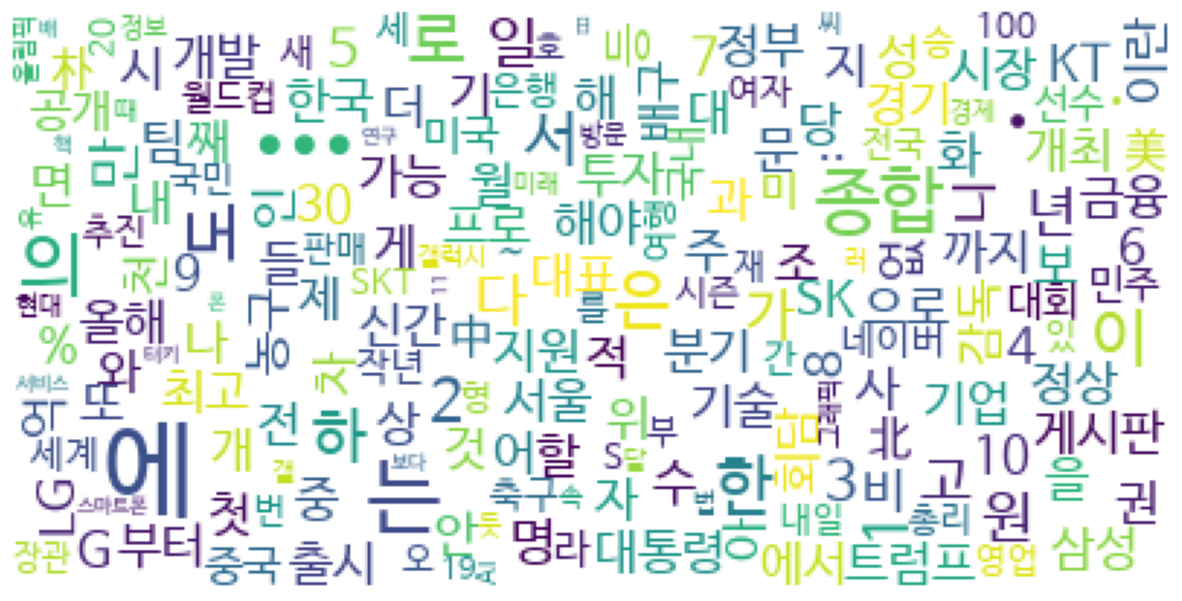

In [27]:
from wordcloud import WordCloud
from collections import Counter

counts = Counter(morph)
tags = counts.most_common(200)

wc = WordCloud(font_path=font_path, background_color="white", max_font_size=50)
cloud = wc.generate_from_frequencies(dict(tags))

plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(cloud)
plt.show()

전처리의 필요성 존재